# Aim

Fit an autoregressive model to Keck TT data, and see how good of a description it is.

In [209]:
using Convex, Plots, NPZ, ECOS, DSP, Distributions
import Statistics: mean
rms(x) = x .^ 2 |> mean |> sqrt

rms (generic function with 1 method)

In [ ]:

pols = ...
plot(pols, xlabel="Time", ylabel="Tip (mas)")

In [194]:
pols |> size

(35805,)

In [195]:
rms(pols .- mean(pols))

0.09417009f0

In [197]:
ar_len = 2
n = length(pols)

TTs_mat = Matrix{Float64}(undef, n - ar_len, ar_len)
for i = 1:ar_len
   TTs_mat[:, i] = pols[ar_len - i + 1 : n - i, 1] 
end

# Solve autoregressive problem
ar_coef = Variable(ar_len)
problem = minimize(sumsquares(TTs_mat * ar_coef - pols[ar_len + 1 : end, 1]))
solve!(problem, () -> ECOS.Optimizer(max_iters=400, verbose=0))

In [198]:
ar_residual = pols[ar_len:end-1] .- (TTs_mat * evaluate(ar_coef));

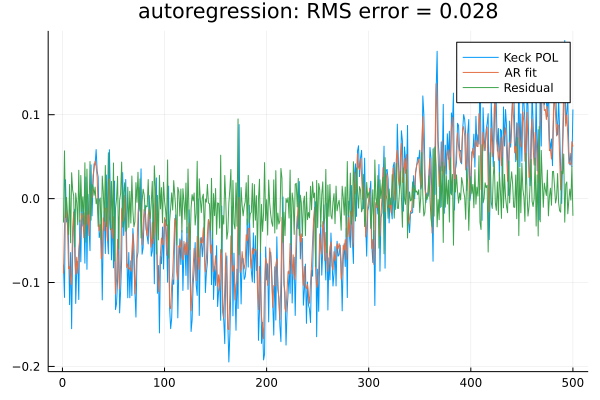

In [199]:
plot(pols[1:500], label="Keck POL")
plot!((TTs_mat * evaluate(ar_coef))[1:500], label="AR fit"; 
    title="autoregression: RMS error = $(round(rms(ar_residual); digits=3))")
plot!(ar_residual[1:500], label="Residual")

In [200]:
rms(ar_residual)

0.027683215121665796

In [201]:
psd(x) = abs.(fft(x)[length(x)÷2+1:end] .^ 2)

psd (generic function with 1 method)

In [203]:
plot_per(p::DSP.Periodograms.Periodogram) = plot(p.freq[10:end], p.power[10:end])

plot_per (generic function with 1 method)

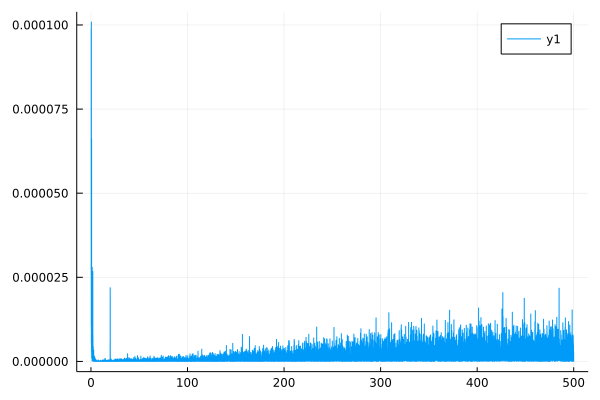

In [204]:
periodogram(ar_residual, fs=1000) |> plot_per